<a href="https://colab.research.google.com/github/Chimamuelo/Coding-Nomads-Deep-Learning-1/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Splitting

## Setup

In [ ]:
!pip install torchmetrics attrdict -q

In [ ]:
%%capture
# Install libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchmetrics

## Download the dataset

In [ ]:
#df=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/train.csv')
#df_test=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/test.csv')

## Split your data

In [ ]:
train=df.loc[:,df.columns!='Survived']
valid=df['Survived']

# EDA & data visualization

In [ ]:
print(train.shape)
print(valid.shape)

(891, 11)
(891,)


In [ ]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
valid

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
for column in train.columns:
  data_type=train[column].dtypes
  print(column,data_type)

PassengerId int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [ ]:
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

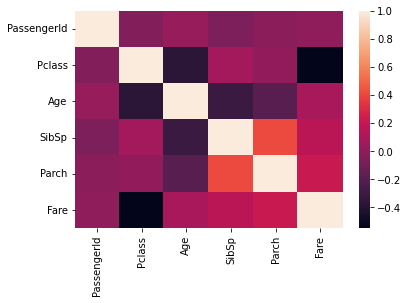

In [ ]:
sns.heatmap(train.corr());

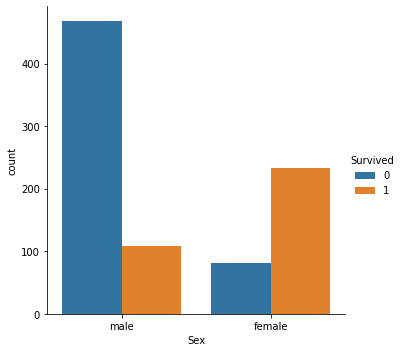

In [ ]:
sns.catplot(x='Sex',hue='Survived',data=df,kind='count')

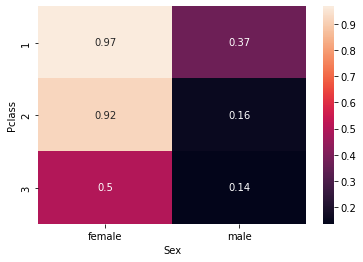

In [ ]:
heatmap1_data = pd.pivot_table(df, values='Survived', 
                     index=['Pclass'], 
                     columns='Sex')
sns.heatmap(heatmap1_data,annot=True)

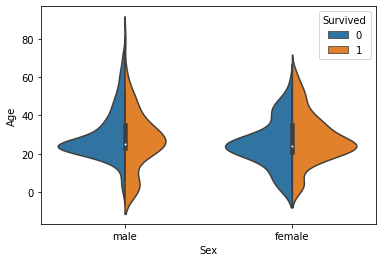

In [ ]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

# Feature engineering and transformation

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder(categories='auto')
df['Pclass']=oe.fit_transform(df[['Pclass']])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,2.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,0.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,0.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df=pd.concat([df,pd.get_dummies(df['Sex'],prefix='Sex')],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [ ]:
df=pd.concat([df,pd.get_dummies(df['Embarked'],prefix='Embarked')],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
df.drop('Ticket',axis=1,inplace=True)

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.drop(['PassengerId'],axis=1,inplace=True)

# Traditional ML modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,stratify=y)

In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
672,1.0,70.0,0,0,10.5000,0,1,0,0,1
506,1.0,33.0,0,2,26.0000,1,0,0,0,1
178,1.0,30.0,0,0,13.0000,0,1,0,0,1
289,2.0,22.0,0,0,7.7500,1,0,0,1,0
118,0.0,24.0,0,1,247.5208,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
697,2.0,24.0,0,0,7.7333,1,0,0,1,0
403,2.0,28.0,1,0,15.8500,0,1,0,0,1
770,2.0,24.0,0,0,9.5000,0,1,0,0,1
55,0.0,24.0,0,0,35.5000,0,1,0,0,1


In [ ]:
y_test

672    0
506    1
178    0
289    1
118    0
      ..
697    1
403    0
770    0
55     1
568    0
Name: Survived, Length: 179, dtype: int64

In [ ]:
y_train

314    0
797    1
396    0
106    1
305    1
      ..
431    1
701    1
86     0
480    0
873    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
314,1.0,43.00,1,1,26.2500,0,1,0,0,1
797,2.0,31.00,0,0,8.6833,1,0,0,0,1
396,2.0,31.00,0,0,7.8542,1,0,0,0,1
106,2.0,21.00,0,0,7.6500,1,0,0,0,1
305,0.0,0.92,1,2,151.5500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
431,2.0,24.00,1,0,16.1000,1,0,0,0,1
701,0.0,35.00,0,0,26.2875,0,1,0,0,1
86,2.0,16.00,1,3,34.3750,0,1,0,0,1
480,2.0,9.00,5,2,46.9000,0,1,0,0,1


In [ ]:
model=RandomForestClassifier()
param_grid = {
                 'n_estimators': [5, 10, 15, 20,30],
                 'max_depth': [2, 5, 7, 9,11,15,20]
             }

In [ ]:
grid_clf = GridSearchCV(model, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9, 11, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 30]})

In [ ]:
mod=xgb.XGBClassifier()
mod.fit(X_train,y_train)

XGBClassifier()

In [ ]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 15}

In [ ]:
final_model=grid_clf.best_estimator_

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

In [ ]:
pred=final_model.predict(X_test)
predict=mod.predict(X_test)

In [ ]:
precision = precision_score(y_test,pred)
prec=precision_score(y_test,predict)
print(precision,prec)

0.8518518518518519 0.8103448275862069


In [ ]:
## recall
recall=recall_score(y_test,pred)
rec=recall_score(y_test,predict)
print(recall,rec)

0.6666666666666666 0.6811594202898551


In [ ]:
score=f1_score(y_test,pred)
score_g=f1_score(y_test,predict)
print(score,score_g)


0.7479674796747967 0.7401574803149606


In [ ]:
con_matrix=confusion_matrix(y_test,pred)
con_matrix

array([[102,   8],
       [ 23,  46]])

[]

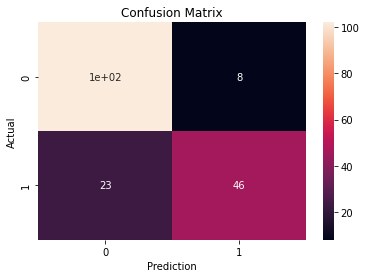

In [ ]:
ax=sns.heatmap(con_matrix,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot()

In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [ ]:
oe=OrdinalEncoder(categories='auto')
df_test['Pclass']=oe.fit_transform(df_test[['Pclass']])

In [ ]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Sex'],prefix='Sex')],axis=1)
df_test.drop(['Sex'],axis=1,inplace=True)

In [ ]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Embarked'],prefix='Embarked')],axis=1)
df_test.drop(['Embarked'],axis=1,inplace=True)

In [ ]:
df_test.drop('Name',axis=1,inplace=True)

In [ ]:
df_test.drop('Ticket',axis=1,inplace=True)

In [ ]:
df_test.drop('Cabin',axis=1,inplace=True)

In [ ]:
idx=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

In [ ]:
prediction=final_model.predict(df_test)
predictions=mod.predict(df_test)

In [ ]:
out=prediction.round().astype(int)
outs=predictions.round().astype(int)

In [ ]:
type(out)

numpy.ndarray

In [ ]:
final=pd.concat([idx,pd.DataFrame(data=out,columns=['Survived'])],axis=1)
finals=pd.concat([idx,pd.DataFrame(data=outs,columns=['Survived'])],axis=1)

In [ ]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final.to_csv('no_deep.csv',index=False)

In [ ]:
finals.to_csv('xgb.csv',index=False)

# Pure `torch` model

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F


from torch.utils.data import Dataset, DataLoader

In [ ]:
#Create Dataset
class Titanic(Dataset):
  def __init__(self,x,y):
    super().__init__()

    #X,y as train and label ds
    self.X=torch.tensor(x.to_numpy(),dtype=torch.float32)
    self.y=torch.tensor(y.to_numpy(),dtype=torch.float32)

  def __len__(self):
    return len(self.X)
  
  
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]




In [ ]:
train_ds=Titanic(X_train,y_train)
valid_ds=Titanic(X_test,y_test)

In [ ]:
X.describe

<bound method NDFrame.describe of      Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       2.0  22.0      1      0   7.2500           0         1           0   
1       0.0  38.0      1      0  71.2833           1         0           1   
2       2.0  26.0      0      0   7.9250           1         0           0   
3       0.0  35.0      1      0  53.1000           1         0           0   
4       2.0  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886     1.0  27.0      0      0  13.0000           0         1           0   
887     0.0  19.0      0      0  30.0000           1         0           0   
888     2.0  24.0      1      2  23.4500           1         0           0   
889     0.0  26.0      0      0  30.0000           0         1           1   
890     2.0  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  

In [ ]:
train_ds[2]

(tensor([ 2.0000, 31.0000,  0.0000,  0.0000,  7.8542,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000]), tensor(0.))

In [ ]:
valid_ds[2]

(tensor([ 1., 30.,  0.,  0., 13.,  0.,  1.,  0.,  0.,  1.]), tensor(0.))

In [ ]:
# Create Dataloader
train_dl =DataLoader(train_ds,
                     batch_size=128,
                     shuffle=True,
                     )
valid_dl =DataLoader(valid_ds,
                     batch_size=128,
                     
                     )

In [ ]:
train_iter=iter(train_dl)
input,label=train_iter.next()
print(input.shape[1])

10


In [ ]:
#build model
def model(input_features,output_features,n_label):
  
  
  model=nn.Sequential(
      nn.Linear(input_features,output_features),
      nn.ReLU(),
      nn.BatchNorm1d(output_features),
      nn.Dropout(.2),
      nn.Linear(int(output_features),int(output_features)),
      nn.ReLU(),
      nn.BatchNorm1d(int(output_features)),
      nn.Dropout(.2),
      nn.Linear(int(output_features),n_label)
                      )
  return model


In [ ]:
model=model(10,256,2)

In [ ]:
device = torch.device("cuda")
try:
  model.to(device)
except:
  print('Model device: ', next(model.parameters()).device)

In [ ]:
len(model)

9

In [ ]:
for x_b, y_b in train_dl:
    break
model(x_b.to(device)).shape



torch.Size([128, 2])

In [ ]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=.001)
metric = torchmetrics.F1Score()

In [ ]:
def train_step(x_b, y_b):

    x_b = x_b.to(device)
    y_b = y_b.to(device)
  
    yhat = model(x_b)
    
 
    loss = loss_func(yhat,y_b)
 
    loss.backward()

    opt.step()
    opt.zero_grad()


    batch_acc = metric(yhat.cpu(), y_b.cpu())


    return loss

In [ ]:
def validation_step(x_b, y_b):
    
    x_b = x_b.to(device)
    y_b = y_b.to(device)
    
    with torch.no_grad():
        
        yhat =model(x_b)
       
        loss =loss_func(yhat,y_b)


    batch_acc = metric(yhat.cpu(), y_b.cpu())

   
    return loss

In [ ]:
N_EPOCHS = 30

In [ ]:
train_losses_step = []
train_losses = []
valid_losses = []
for epoch in range(N_EPOCHS):
   
  model.train() 
  train_loss_epoch = 0.
  for x_b, y_b in train_dl:
    
    y_b=y_b.type(torch.LongTensor)
 
    

    if torch.cuda.is_available():
      x_b, y_b = x_b.cuda(), y_b.cuda()

    opt.zero_grad()
        # Forward Pass
    target = model(x_b)
        # Find the Loss
    loss = loss_func(target,y_b)
        # Calculate gradients
    loss.backward()
        # Update Weights
    opt.step()

    batch_acc = metric(target.cpu(), y_b.cpu())
        # Calculate Loss
    batch_acc = metric(target.cpu(), y_b.cpu())
    train_loss_epoch += loss
    train_losses_step.append(loss.item())

  train_loss_epoch /= len(train_dl)
  train_losses.append(train_loss_epoch.item())
  train_acc = metric.compute()
    
    
  model.eval() 
  val_loss_epoch = 0.
  for x_b, y_b in valid_dl:
    y_b=y_b.type(torch.LongTensor)
       
        # Transfer Data to GPU if available
    if torch.cuda.is_available():
        x_b, y_b = x_b.cuda(), y_b.cuda()
         
        # Forward Pass
    target = model(x_b)
        # Find the Loss
    loss = loss_func(target,y_b)
        # Calculate Loss
    batch_acc = metric(target.cpu(), y_b.cpu())
        
  
    val_loss_epoch += loss
    
  val_loss_epoch /= len(valid_dl)
  valid_acc = metric.compute()
  valid_losses.append(val_loss_epoch.item())

  print(f"Epoch: {epoch}, Train loss: {train_loss_epoch:.04f} Train acc: {float(train_acc):.04f}, Valid loss: {val_loss_epoch} Valid Acc: {float(valid_acc):.04f}")

Epoch: 0, Train loss: 0.6997 Train acc: 0.6236, Valid loss: 0.642179548740387 Valid Acc: 0.6313
Epoch: 1, Train loss: 0.6164 Train acc: 0.6429, Valid loss: 0.6362088918685913 Valid Acc: 0.6460
Epoch: 2, Train loss: 0.5723 Train acc: 0.6637, Valid loss: 0.6056127548217773 Valid Acc: 0.6654
Epoch: 3, Train loss: 0.5561 Train acc: 0.6838, Valid loss: 0.5777509212493896 Valid Acc: 0.6856
Epoch: 4, Train loss: 0.5340 Train acc: 0.6968, Valid loss: 0.5459779500961304 Valid Acc: 0.6977
Epoch: 5, Train loss: 0.5210 Train acc: 0.7092, Valid loss: 0.5268558859825134 Valid Acc: 0.7101
Epoch: 6, Train loss: 0.5074 Train acc: 0.7174, Valid loss: 0.5117261409759521 Valid Acc: 0.7181
Epoch: 7, Train loss: 0.4920 Train acc: 0.7236, Valid loss: 0.5086590051651001 Valid Acc: 0.7242
Epoch: 8, Train loss: 0.4942 Train acc: 0.7294, Valid loss: 0.5048465132713318 Valid Acc: 0.7300
Epoch: 9, Train loss: 0.4895 Train acc: 0.7364, Valid loss: 0.5020026564598083 Valid Acc: 0.7370
Epoch: 10, Train loss: 0.4655 T

In [ ]:
input_tensor=torch.tensor(df_test.values,dtype=torch.float32)
input_tensor=input_tensor.to(device)
final=model(input_tensor)

In [ ]:

pred = torch.argmax(final, dim=1)
pred_numpy=pred.cpu().detach().numpy()

In [ ]:
type(pred_numpy)

numpy.ndarray

In [ ]:
df_test=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/test.csv')
idx=df_test['PassengerId']

In [ ]:
final=pd.concat([idx,pd.DataFrame(data=pred_numpy,columns=['Survived'])],axis=1)
#final=final['Survived'].astype(int)

In [ ]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final.to_csv('deep.csv',index=False)

Text(0.5, 0, 'Epoch')

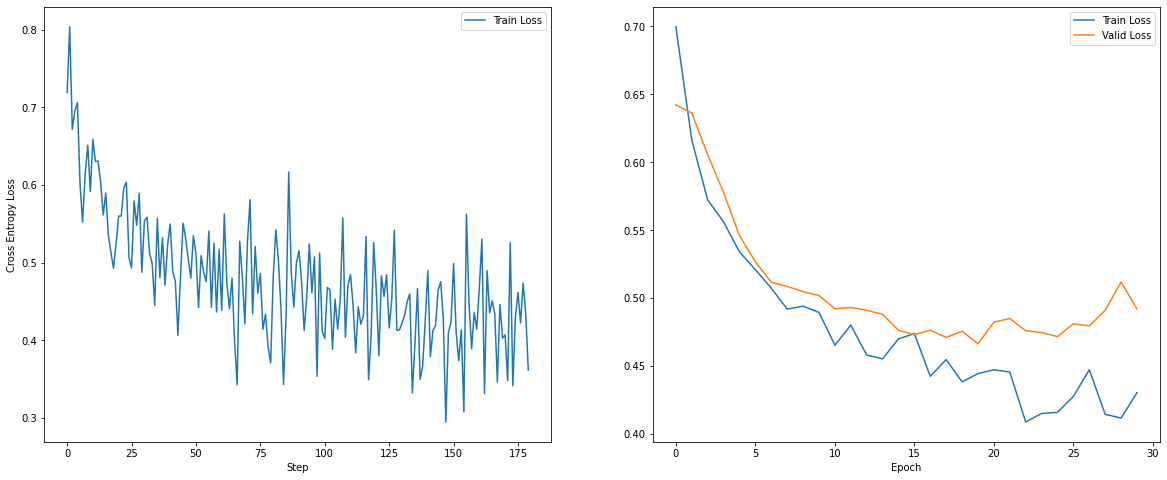

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8))
ax1, ax2 = axes
ax1.plot(train_losses_step, label='Train Loss')
ax2.plot(train_losses, label='Train Loss')
ax2.plot(valid_losses, label='Valid Loss')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Step')
ax1.set_ylabel('Cross Entropy Loss')
ax2.set_xlabel('Epoch')

# High-level libraries and tabular frameworks

# Model selection and test set evaluation

In [ ]:
# Your code here

# Notes and findings

What did you learn?